<a href="https://colab.research.google.com/github/matthewbegun/MXN500/blob/main/MXN500_2024_LEC_08_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)
library(broom)

In [ ]:
# ggplot options
# options(repr.plot.width=6, repr.plot.height=2) # for docx
options(repr.plot.width=12, repr.plot.height=6) # for html

In [ ]:
# Load data:
charles <- read_csv("charles.csv")

Rows: 9 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): Temperature, Volume

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Temperature,Volume
<dbl>,<dbl>
0,107.9
5,109.7
10,111.7
15,113.6
20,115.5
25,117.5
30,119.4
35,121.3
40,123.2


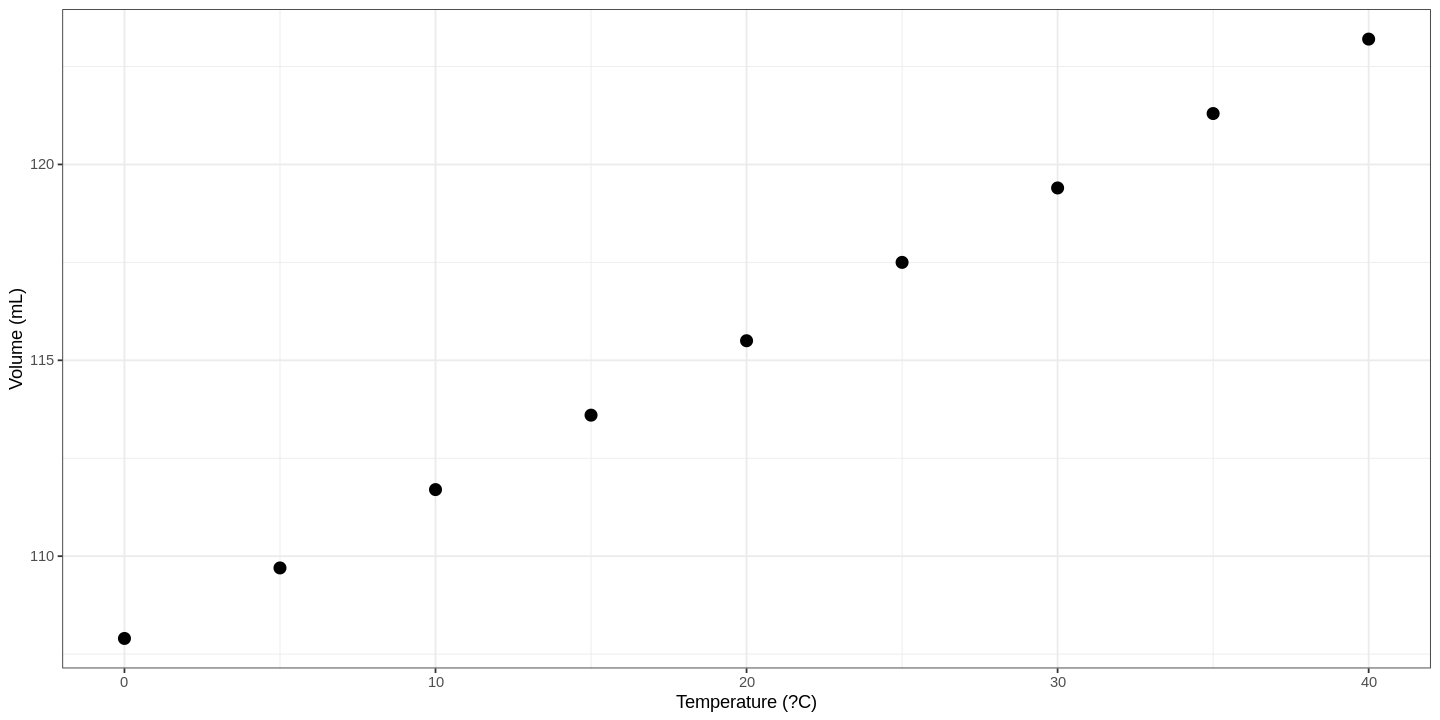

In [ ]:
# Visual:
charles
ggplot(data=charles, aes(x=Temperature, y=Volume)) + geom_point(size=3) +
  xlab("Temperature (?C)") +
  ylab("Volume (mL)") + theme_bw()

In [ ]:
# The lm() function allows us to fit a linear model easily.
charles_lm <- lm(data=charles, Volume ~ Temperature)
charles_lm



Call:
lm(formula = Volume ~ Temperature, data = charles)

Coefficients:
(Intercept)  Temperature  
   107.8467       0.3843  


In [ ]:
# Running the summary() function on a fitted linear model gives us lots more
# information about our fitted model, including R-squared.
charles_summ <- summary(charles_lm)
charles_summ


Call:
lm(formula = Volume ~ Temperature, data = charles)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.068333 -0.020000  0.001667  0.023333  0.053333 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 1.078e+02  2.527e-02    4268  < 2e-16 ***
Temperature 3.843e-01  1.062e-03     362 3.24e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.04112 on 7 degrees of freedom
Multiple R-squared:  0.9999,	Adjusted R-squared:  0.9999 
F-statistic: 1.311e+05 on 1 and 7 DF,  p-value: 3.239e-16


In [ ]:
# We can use the tidy function to produce our confidence intervals.
charles_parameters <- tidy(charles_lm, conf.int = TRUE, conf.level = 0.95)
charles_parameters

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),107.8466667,0.025271018,4267.6028,1.024440e-23,107.7869102,107.9064231
Temperature,0.3843333,0.001061595,362.0338,3.239358e-16,0.3818231,0.3868436


In [ ]:
# a) -----
# Beta_0 = 107.8467
# Beta_1 = 0.3843

# With interpretation:
# A linear model was fit to understand the relationship between volume and
# temperature. The parameter beta_1 describes the expected change in volume for
# every unit increase in temperature. The parameter beta_0 describes the
# y-intercept, and gives the expected volume when the temperature is zero.

# Our model: y_i = 0.3843x_i + 107.8467 + e_i

# b) -----
# R-squared = 0.9999
# With interpretation:
# The model explains 99.99% of the variability within the data.

# c) -----
# H_0: B_0 = 0
# H_1: B_0 != 0
# Test statistic: 4268, DF: 7
# 95% CI: (107.787, 107.906)
# p-value: 1.02e-23

# With interpretation:
# The 95% CI for the intercept did not contain 0 and was strictly positive.
# There is significant evidence (p-value = 1.02e-23) against the null
# hypothesis that the intercept is 0.

# H_0: B_1 = 0
# H_1: B_1 != 0
# Test statistic: 362, DF: 7
# 95% CI: (0.382, 0.387)
# p-value: 3.24e-16

# With interpretation:
# The 95% CI for the slope did not contain 0 and was strictly positive.
# There is significant evidence (p-value = 3.24e-16) against the null
# hypothesis that volume is linearly independent of minimum temperature.

In [ ]:
# is there a relationship between petal length and width
# View data:
head(iris, 10)
dim(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa
8,5.0,3.4,1.5,0.2,setosa
9,4.4,2.9,1.4,0.2,setosa


[1] 150   5

`geom_smooth()` using formula = 'y ~ x'


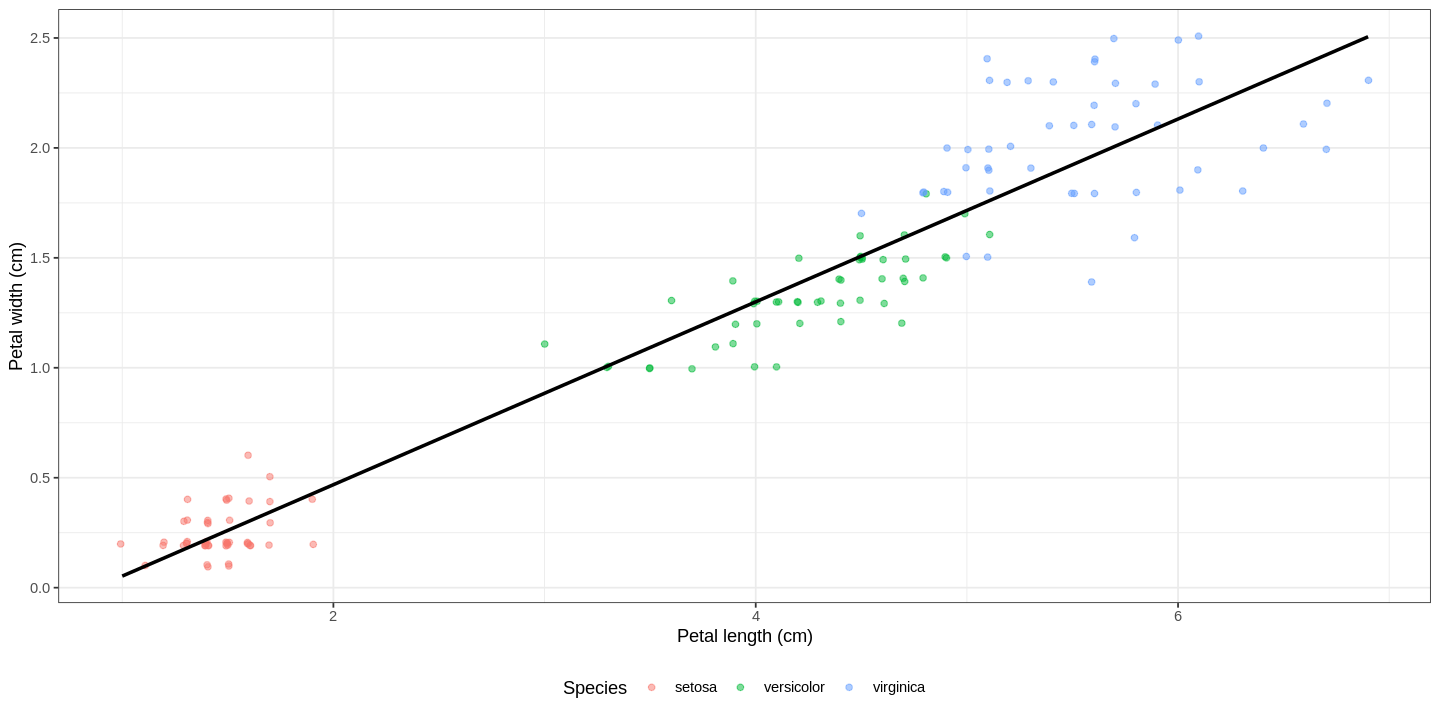

In [ ]:
# Visual:
ggplot(data=iris, aes(x=Petal.Length, y=Petal.Width)) +
  geom_point(aes(color=Species), position=position_jitter(w=0.01, h=0.01), alpha=0.5) +
  xlab("Petal length (cm)") +
  ylab("Petal width (cm)") +
  theme_bw() +
  geom_smooth(method="lm", se=F, col="black") +
  theme(legend.position="bottom")

In [ ]:
# Fit linear model:
iris_lm <- lm(data=iris, Petal.Width ~ Petal.Length)
summary(iris_lm)


Call:
lm(formula = Petal.Width ~ Petal.Length, data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.56515 -0.12358 -0.01898  0.13288  0.64272 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.363076   0.039762  -9.131  4.7e-16 ***
Petal.Length  0.415755   0.009582  43.387  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2065 on 148 degrees of freedom
Multiple R-squared:  0.9271,	Adjusted R-squared:  0.9266 
F-statistic:  1882 on 1 and 148 DF,  p-value: < 2.2e-16


In [ ]:
# Confidence intervals:
tidy(iris_lm, conf.int = TRUE, conf.level = 0.95)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-0.3630755,0.039761990,-9.131221,4.699798e-16,-0.4416501,-0.2845010
Petal.Length,0.4157554,0.009582436,43.387237,4.675004e-86,0.3968193,0.4346915


In [ ]:
# Reporting:
# B_0 = -0.3631
# Test statistic: -9.131, DF: 148
# 95% CI: (-0.442, -0.285)
# p-value: 4.70e-16 (reject H_0)

# B_1 = 0.416
# Test statistic: -43.387, DF: 148
# 95% CI: (0.397, 0.435)
# p-value: 4.68e-86 (reject H_0)

# R-squared: Model explains 92.71% of variability within the data.

In [ ]:
# Assumptions:
# Linearity: Our model is a linear function of x.


,Petal.Width,Petal.Length,.hat,.sigma,.cooksd,.fitted,.resid,.stdresid,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.2,1.4,0.01864138,0.2071795,8.179092e-05,0.2189821,-0.01898206,-0.0927988,setosa
2,0.2,1.4,0.01864138,0.2071795,8.179092e-05,0.2189821,-0.01898206,-0.0927988,setosa
3,0.2,1.3,0.01967858,0.2071769,1.225798e-04,0.1774065,0.02259348,0.1105126,setosa
4,0.2,1.5,0.01764725,0.2071242,7.864574e-04,0.2605576,-0.06055760,-0.2959019,setosa
5,0.2,1.4,0.01864138,0.2071795,8.179092e-05,0.2189821,-0.01898206,-0.0927988,setosa
6,0.4,1.7,0.01578821,0.2071326,6.056675e-04,0.3437087,0.05629131,0.2747957,setosa


[1] 150   9

`geom_smooth()` using formula = 'y ~ x'


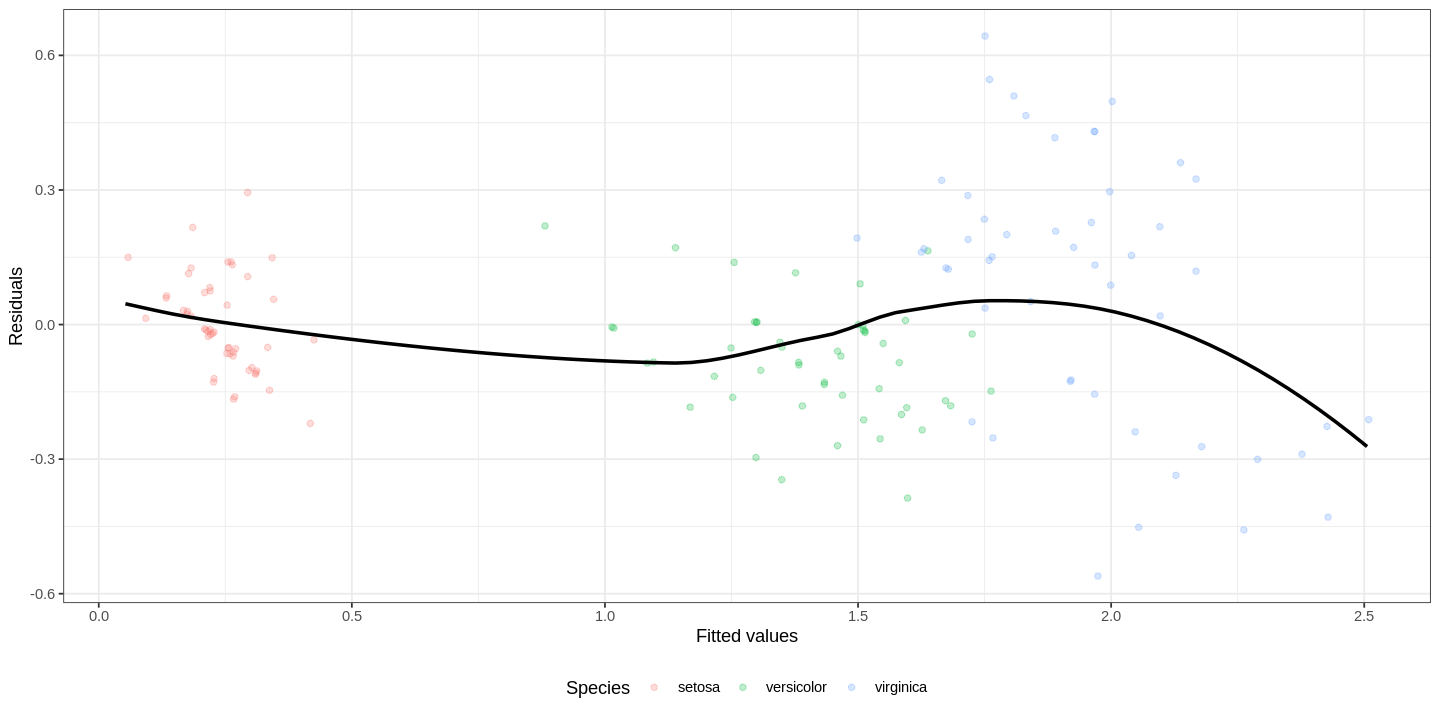

In [ ]:
# Homogeneity/Homoscedasticity/Independance of errors:
# Use fortify() from ggplot2 to output a range of information from linear model.
iris_fort <- fortify(iris_lm)
iris_fort$Species <- iris$Species
head(iris_fort)
dim(iris_fort)
# Plot fitted vs residual values:
ggplot(data=iris_fort, aes(x=.fitted, y=.resid)) +
  geom_point(position=position_jitter(h=0.01, w=0.01),
             alpha=0.25, aes(color=Species)) +
  geom_smooth(method="loess", col="black", se=F) + theme_bw() +
  xlab("Fitted values") + ylab("Residuals") +
  theme(legend.position="bottom")
# From left to right, we see some vertical spreading of residuals and the trend
# deviates from the mean around 0, indicating a lack of homogeneity and
# unexplained variation in our data.
# This could be an example of Simpson's Paradox


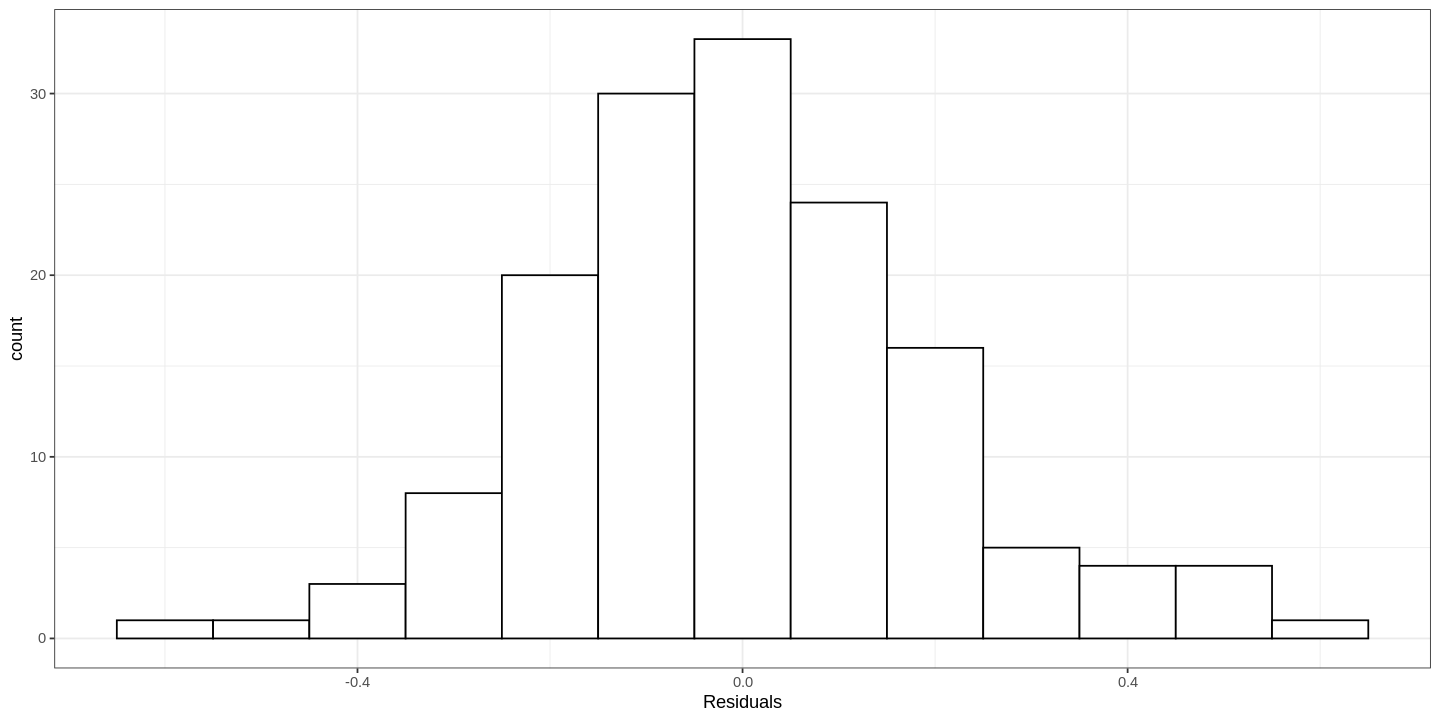

In [ ]:
# Normality of errors:
ggplot(data=iris_fort, aes(x=.resid)) +
  geom_histogram(binwidth=0.1, center=0,
                 color="black", fill="white") + theme_bw() + xlab("Residuals")


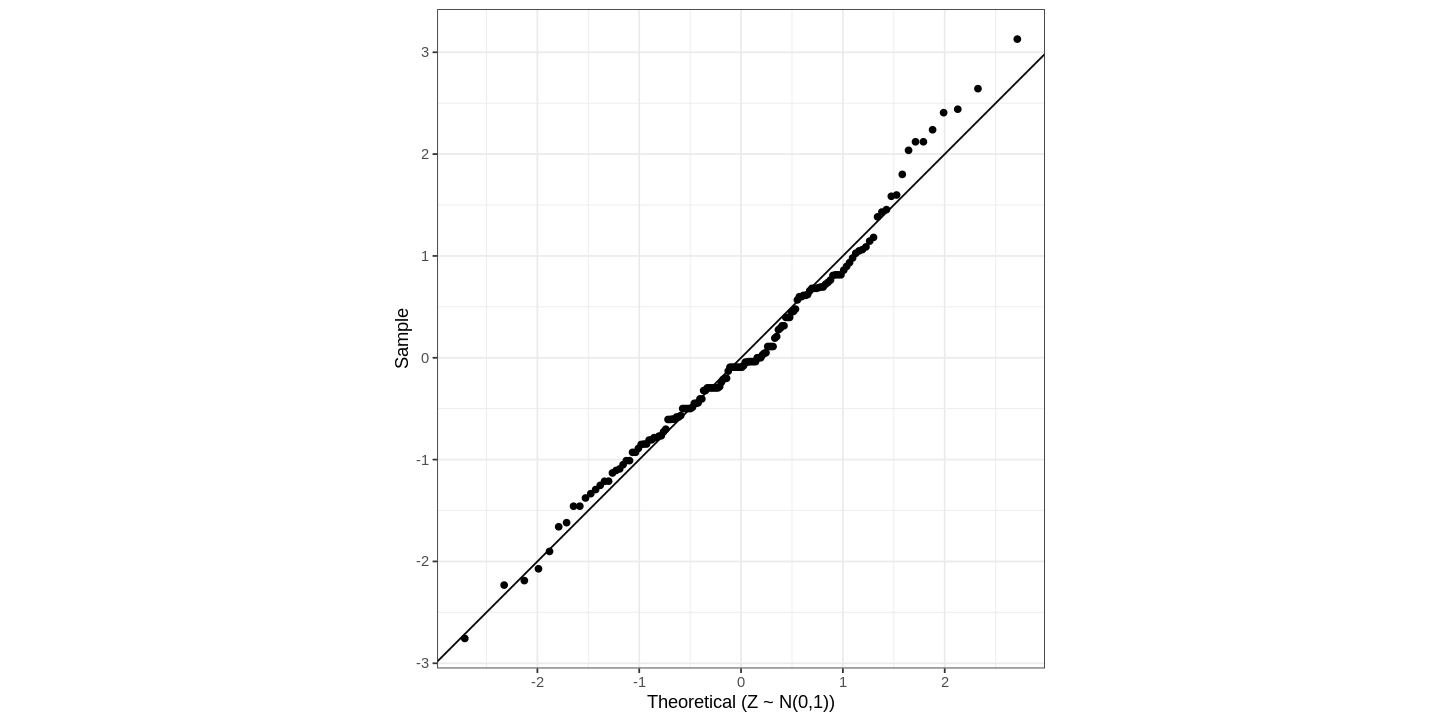

In [ ]:
# The residuals appear approximately normal based on the histogram. Let's also
# consult the QQ-plot.
ggplot(data=iris_fort, aes(sample=.stdresid)) +
  stat_qq(geom="point") + geom_abline() +
  xlab("Theoretical (Z ~ N(0,1))") +
  ylab("Sample") + coord_equal() + theme_bw()
# Very minor deviation from standard normal. Can conclude that the errors appear
# approximately normal based on plots.
